In [1]:
import numpy as np
import scipy

# PCA 

> More importantly, as others have said, in a situation where you have a WHOLE BUNCH of independent variables, PCA helps you figure out which linear combinations of these variables matter the most. 

In [2]:
# X is a 9 x 2 matrix with 9 samples and 2 features x_1 and x_2
X = np.array(
    [
        [2.5, 2.4],
        [0.5, 0.7],
        [2.2, 2.9],
        [1.9, 2.2],
        [3.1, 3.0],
        [2.3, 2.7],
        [2.0, 6.0],
        [1.0, 1.0],
        [1.5, 1.6],
        [1.1, 0.9],
    ]
)

X_copy = X.copy()

# get num samples and features

num_samples, num_features = X.shape[0], X.shape[1]

# x_1 and x_2 are first and second column of X respectively

x_1 = X[:, 0].copy()
x_2 = X[:, 1].copy()


print(x_1)
print(x_2)

[2.5 0.5 2.2 1.9 3.1 2.3 2.  1.  1.5 1.1]
[2.4 0.7 2.9 2.2 3.  2.7 6.  1.  1.6 0.9]


## Step 1: Standardize the data X

Subtract each column of X by its mean, and divide by its standard deviation. More specifically, calculate the mean of x_1 and x_2 respectively to get x_1 - x_1_mean, x_2 - x_2_mean, following this, divide the aforementioned by x_1_std, x_2_std respectively. 

In [3]:
# Step 1: Subtract each column of X by its mean, and divide by its standard deviation. 
#         More specifically, calculate the mean of x_1 and x_2 respectively to get x_1 - x_1_mean, x_2 - x_2_mean, following this, divide the aforementioned by x_1_std, x_2_std respectively. 

x_1_mean = np.mean(x_1, axis = None)
x_2_mean = np.mean(x_2, axis =None)
x_1_std = np.std(x_1, axis = None)
x_2_std = np.std(x_2, axis = None)

x_1_standardized = (x_1 - x_1_mean) / x_1_std
x_2_standardized = (x_2 - x_2_mean) / x_2_std


X[:, 0] = x_1_standardized
X[:, 1] = x_2_standardized

# we can do the above in one step using numpy broadcasting
X_standardized = (X_copy - np.mean(X_copy, axis=0)) / np.std(X_copy, axis = 0)
assert np.isclose(X, X_standardized, rtol=1e-05, atol=1e-08, equal_nan=False).all() == True

# We can check against sklearn's standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standardized_sklearn = scaler.fit_transform(X_copy)
assert np.isclose(X_standardized_sklearn, X_standardized, rtol=1e-05, atol=1e-08, equal_nan=False).all() == True

One important consequence is that now the mean of `x_1_standardized` and `x_2_standardized` is now 0, with std 1. This will be important in the next step.

In [4]:
# Putting our above into a function
def standardize(X: np.ndarray) -> np.ndarray:
    """Standardize X where we assume X is of num_samples x num_features"""
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)


## Step 2: Covariance of the X

As we know the covariance matrix is given as follows for a  data with 3 features.

$$\begin{bmatrix} \color{Olive}{\sigma_{1,1}} & \sigma_{1,2} & \sigma_{1,3} \\ \sigma_{2,1} & \color{Olive}{\sigma_{2,2}} & \sigma_{2,3} \\ \sigma_{3,1} & \sigma_{3,2} & \color{Olive}{\sigma_{3,3}} \end{bmatrix}$$

$$\begin{bmatrix} \color{Olive}{\text{cov}(x_1, x_1)} & {\text{cov}(x_1, x_2)} & {\text{cov}(x_1, x_3)} \\ {\text{cov}(x_2, x_1)} & \color{Olive}{\text{cov}(x_2, x_2)} & {\text{cov}(x_2, x_3)} \\ {\text{cov}(x_3, x_1)} & {\text{cov}(x_3, x_2)} & \color{Olive}{\text{cov}(x_3, x_3)} \end{bmatrix}$$

Step 2: Compute the covariance matrix of the standardized X. In other words, for two variables $x_1, x_2$, the covariance of 

$$\text{cov}(x_1, x_2) = \frac1{m-1}\sum_{i=1}^{m} (x_1^{(i)}-\bar x_1)(x_2^{(i)}- \bar x_2)$$

However, if we have standardized the data, the mean of `x_1_standardized` and `x_2_standardized` are 0. Therefore, if we are using the standardized columns, then the above reduces to 
$$\text{cov}(x_{1s}, x_{2s}) = \frac1{m-1}\sum_{i=1}^{m} (x_{1s}^{(i)}-0)(x_{2s}^{(i)}- 0)$$

By linear algebra, we can express the above as $X^TX$ where $X$ is standardized here!

In [5]:
# Step 2: Compute the covariance matrix of the standardized X. 

# Method 1: If we are not using the standardized X, not recommended
# summation = 0
# for x1_val, x2_val in zip(x_1, x_2):
#     summand = (x1_val - x_1_mean) * (x2_val - x_2_mean)
#     summation += summand

# # This gives the cov(x_1, x_2)
# cov_x1_x2 = summation / (num_samples - 1)
# print(cov_x1_x2)
# # Notice that I multiply by num_samples then divide by num_samples - 1 here, because although cov(x_1, x_1) = var(x_1), the numpy variance divide by num_samples and not num_samples - 1
# cov_x1_x_1 = np.var(x_1- x_1_mean, axis=None) * num_samples / (num_samples-1)
# cov_x2_x2 = np.var(x_2-x_2_mean, axis=None) * num_samples / (num_samples-1)

# # We can put the above logic vectorized by using (X-X_mean).T @ (X-X_mean)

# covariance_matrix = (1 / (num_samples - 1)) * np.matmul((X_copy - np.mean(X_copy, axis=0)).T, (X_copy - np.mean(X_copy, axis=0)))
# print(covariance_matrix)

In [6]:
# Method 2: Using the Standardized X

summation = 0
for x1_val, x2_val in zip(x_1_standardized, x_2_standardized):
    summand = (x1_val - 0) * (x2_val - 0)
    summation += summand
# This gives the cov(x_1, x_2)
cov_x1_x2 = summation / (num_samples - 1)

# Notice that I multiply by num_samples then divide by num_samples - 1 here, because although cov(x_1, x_1) = var(x_1), the numpy variance divide by num_samples and not num_samples - 1
cov_x1_x_1 = np.var(x_1_standardized- 0, axis=None) * num_samples / (num_samples-1)
cov_x2_x2 = np.var(x_2_standardized-0, axis=None) * num_samples / (num_samples-1)

# We can put the above logic vectorized by using (X-X_mean).T @ (X-X_mean)

covariance_matrix = (1 / (num_samples - 1)) * np.matmul(X.T, X)
print(covariance_matrix)



[[1.11111111 0.65821258]
 [0.65821258 1.11111111]]


```python
covariance_matrix_X_non_standardized =
                        [[0.61655556 0.71733333]
                         [0.71733333 2.37822222]]

covariance_matrix_X_non_standardized =
                         [[1.11111111 0.65821258]
                          [0.65821258 1.11111111]]

 ```

> Notice that variance of cell 11 and 22 are 1.111 instead of 1, as we should expect 1 since we standardized our columns to have std = 1, so variance = 1, reason is not 1 is because

```python
np.matmul(X.T, X)/ (num_samples-1)
```

instead of

```python
np.matmul(X.T, X)/num_samples
```

In [7]:
def calculate_covariance_matrix(X:np.ndarray):
    """Calculate the covariance matrix for the dataset X"""
    num_samples = X.shape[0]
    
    covariance_matrix = (1 / (num_samples - 1)) * np.matmul((X - np.mean(X, axis=0)).T, (X - np.mean(X, axis=0)))

    return np.asarray(covariance_matrix, dtype=float)


In [8]:
calculate_covariance_matrix(X)

array([[1.11111111, 0.65821258],
       [0.65821258, 1.11111111]])

## Step 3: Calculate the Eigenvector/value of the Covariance Matrix



### Eigenvector from NumPy

In [9]:
# Step 3: Find eigenvector and eigenvalues of the Covariance Matrix

# Where (eigenvector[:,0] corresponds to eigenvalue[0])
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# To verify that indeed covariance_matrix @ eig_vector_1 = eig_value_1 * eig_vector_1

eig_vector_1, eig_vector_2 = eigenvectors[:, 0], eigenvectors[:, 1]
eig_value_1, eig_value_2 = eigenvalues[0], eigenvalues[1]

assert np.isclose(covariance_matrix @ eig_vector_1, eig_value_1 * eig_vector_1, rtol=1e-05, atol=1e-08, equal_nan=False).all() == True
assert np.isclose(covariance_matrix @ eig_vector_2, eig_value_2 * eig_vector_2, rtol=1e-05, atol=1e-08, equal_nan=False).all() == True

In [10]:
eig_vector_1.shape

(2,)

Note that `eig_vector_1` and `eig_vector_2` are column vectors such that column 1 of `eigenvectors` is the eigenvector 1.

### Eigenvector using Scipy SVD

In [11]:
_, evalue, evector =  scipy.linalg.svd(covariance_matrix, full_matrices=True)

## Step 4: Sort the Eigenvectors and Choose Components

It turns out that the eigenvector with the highest eigenvalue is the ***principal component*** of the data set. We will start by sorting the eigenvalues and the corresponding eigenvectors from highest to lowest. And then we take the top N-component (see resemblance here from KNN).

In [12]:
# Recall our eigenstaff~~

print(eigenvalues)
print(eigenvectors)

# When sorted we should see

# [2.63336181 0.36141597 ]

# [[-0.33511197 -0.94217831]
#  [-0.94217831 0.33511197 ]]

[0.45289853 1.76932369]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [13]:
# Step 
# Sort the eigenvalues and corresponding eigenvectors from largest
# to smallest eigenvalue and select the first n_components
n_components = 2
# This gives [1 0] where it says index 1 is largest
idx = eigenvalues.argsort()[::-1]

# get sorted eigenvalues
sorted_eigenvalues = eigenvalues[idx][:n_components]

# unsure on atleast_1d here, but for what I know, eigenvectors[:, idx] gives the sorted numpy array!
sorted_eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]

## Step 5: Transforming the dataset X

The last step is easiest, we just need

```python
reduced_X = X @ sorted_eigenvectors
```

In [14]:
# Project the data onto principal components
X_reduced_hn = np.matmul(X, sorted_eigenvectors)

# assert that the shape is correct, note that number samples will not change, but features will be reduced to the number of components you chose.
assert X_reduced_hn.shape == (num_samples, n_components)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced_sklearn = pca.fit_transform(X)

np.isclose(X_reduced_hn, X_reduced_sklearn)

## Explained Variance of PCA

In [24]:
# Add up all elements in eigenvalues to get "total variance"
total_variance = np.sum(eigenvalues, axis=None)

# sort the eigenvalues, we can either use the one before, or 
# sorted_eigenvalues = sorted(eigenvalues, reverse=True)

# Then the explained variance ratio is just the following:
explained_variance_ratio = []

for evalue in sorted_eigenvalues:
    ratio = (evalue / total_variance) * 100
    explained_variance_ratio.append(ratio)

print("Explained variance ratio: %s" % (explained_variance_ratio))
print("Explained variance ratio sklearn: %s" % (pca.explained_variance_ratio_))

Explained variance ratio: [79.61956611933901, 20.380433880660977]
Explained variance ratio sklearn: [0.79619566 0.20380434]


## Visualizations

https://plotly.com/python/pca-visualization/

There is a lot of overlapping among classes means PCA not very good for the high dimensional dataset. Very few classes can be separated but most of them are mixed. PCA is mainly used for dimensionality reduction, not for visualization. To visualize high dimension data, we mostly use T-SNE

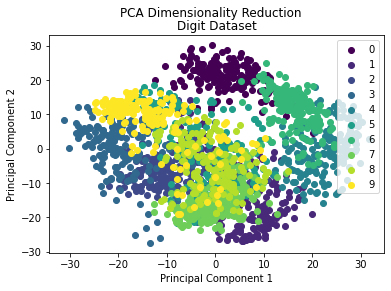

In [25]:
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import numpy as np


def main():

    # Demo of how to reduce the dimensionality of the data to two dimension
    # and plot the results. 

    # Load the dataset
    data = datasets.load_digits()
    X = data.data
    y = data.target

    pca_digits = PCA(n_components=2)
    # Project the data onto the 2 primary principal components
    X_trans = pca_digits.fit_transform(X, 2)

    x1 = X_trans[:, 0]
    x2 = X_trans[:, 1]

    cmap = plt.get_cmap('viridis')
    colors = [cmap(i) for i in np.linspace(0, 1, len(np.unique(y)))]

    class_distr = []
    # Plot the different class distributions
    for i, l in enumerate(np.unique(y)):
        _x1 = x1[y == l]
        _x2 = x2[y == l]
        _y = y[y == l]
        class_distr.append(plt.scatter(_x1, _x2, color=colors[i]))

    # Add a legend
    plt.legend(class_distr, y, loc=1)

    # Axis labels
    plt.suptitle("PCA Dimensionality Reduction")
    plt.title("Digit Dataset")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


if __name__ == "__main__":
    main()

# Readings

- Notes in Reference folder.
- https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
- https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
- https://plotly.com/python/pca-visualization/